<h2>
  How to access data with &nbsp;
  <img src="https://raw.githubusercontent.com/ecmwf/logos/refs/heads/main/logos/earthkit/earthkit-data-light.svg" alt="earthkit" style="height:2em; vertical-align:middle; margin-top:-9px;">
</h2>

In this notebook we'll show you how to easily access a wide variety of Earth science data from many different sources using **earthkit-data**.

If you haven't installed earthkit-data yet, simply run the cell below.

In [ ]:
!pip install earthkit-data

You can import all of your installed earthkit packages with:

In [1]:
import earthkit as ek

### Accessing data from a file

The most straightforward example of using **earthkit-data** is to access a local file on disk. We can use the `from_source` function, with `"file"` as the source type, and simply pass in the file path.

For example, with a local NetCDF file:

In [2]:
data = ek.data.from_source("file", "era5-monthly-mean-2t-199312.nc")
data

NetCDFFieldListReader(era5-monthly-mean-2t-199312.nc)

And equivalently with a local GRIB file:

In [3]:
data = ek.data.from_source("file", "era5-monthly-mean-2t-199312.grib")
data

GRIBReader(era5-monthly-mean-2t-199312.grib)

Notice that **earthkit-data** is *format-agnostic* - that is, we didn't need to tell **earthkit-data** anything about the *format* of our data - it can infer the file format from the file itself. This allows you to use a single, unified interface for all of your earth science data, without the need to use different tools for each type of file.

Once we have our data in **earthkit-data**, we can inspect it:

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19931201,0,0,an,0,regular_ll


Or we can check for metadata keys:

In [5]:
data.metadata("short_name")

['2t']

And we can convert it to familiar Python data structures:

In [6]:
data.to_xarray()

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    2t         (latitude, longitude) float64 8MB ...
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       moda
    levtype:      sfc
    type:         an
    ...           ...
    date:         19931201
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

In [7]:
data.to_numpy()

array([[[242.57730103, 242.57730103, 242.57730103, ..., 242.57730103,
         242.57730103, 242.57730103],
        [242.69058228, 242.69058228, 242.68862915, ..., 242.69448853,
         242.6925354 , 242.6925354 ],
        [242.93667603, 242.9347229 , 242.93276978, ..., 242.9425354 ,
         242.94058228, 242.93862915],
        ...,
        [245.00112915, 244.99917603, 244.99917603, ..., 245.00112915,
         245.00112915, 245.00112915],
        [244.80776978, 244.80776978, 244.80776978, ..., 244.8097229 ,
         244.8097229 , 244.80776978],
        [244.5519104 , 244.5519104 , 244.5519104 , ..., 244.5519104 ,
         244.5519104 , 244.5519104 ]]])

Or we can continue in the **earthkit** ecosystem to process and visualise the data, which will be covered in more detail in later notebooks in this series:

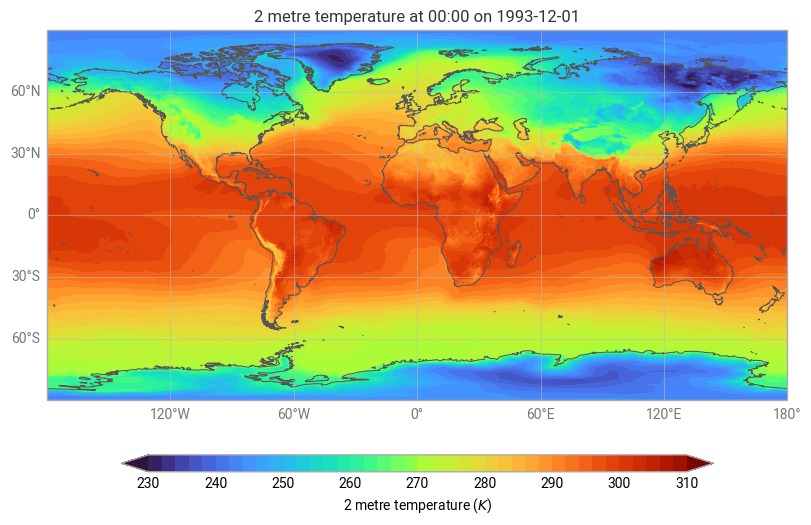

In [8]:
ek.plots.quickplot(data)

### Other source types

Of course, **earthkit-data** does so much more than just local files. You can also access data from:

- URLs or URL patterns
- S3 buckets
- OpenDAP endpoints
- directly from Copernicus data services like the Climate and Atmosphere Data Stores and WEkEO
- directly from some of ECMWF's data services like MARS and polytope.

### Find out more

Explore the [earthkit-data documentation](https://earthkit-data.readthedocs.io/en/latest/) for many more examples and a user guide, or star and watch the [repository on Github](https://github.com/ecmwf/earthkit-data) to be kept up-to-date on the latest developments.